In [ ]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from tensorflow import keras
from glob import glob
from tqdm import notebook
from sklearn import preprocessing
from keras import Model
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D, BatchNormalization
from keras import optimizers
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import sys, os
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.models import model_from_json
import numpy as np

In [ ]:
class DataLoader():
  def __init__(self, path):
    self.path = path
    
  
  def preprocessing(self,instancePath):
    image = load_img(instancePath, target_size=(64,64,1))
    image = img_to_array(image)
    image /= 255.0
    image = image.reshape((image.shape[0], image.shape[1], image.shape[2]))
    #image = preprocess_input(image)
    return image

  def prepare_train_data(self):
    X_train = []
    y_train = []

    for class_folder_name in os.listdir(self.path):
      class_folder_path = os.path.join(self.path, class_folder_name)
      for img in notebook.tqdm(os.listdir(class_folder_path)):
        imgpath = os.path.join(class_folder_path, img)
        img = self.preprocessing(imgpath)
        X_train.append(img)
        y_train.append(class_folder_name)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    
    le = preprocessing.LabelEncoder()
    y_train = le.fit_transform(y_train)
    print(np.unique(y_train))   

    print(f'X_train shape:{X_train.shape}\nY_train shape:{y_train.shape}')
    return X_train,y_train

In [ ]:
class DataLoader():
  def __init__(self, path):
    self.path = path
    
  
  def preprocessing(self,instancePath):

    image = cv2.imread(instancePath)
    grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    grayimage=cv2.resize(grayimage,(64,64))
    #image = preprocess_input(image)
    return grayimage

  def prepare_train_data(self):
    X_train = []
    y_train = []

    for class_folder_name in os.listdir(self.path):
      class_folder_path = os.path.join(self.path, class_folder_name)
      for img in notebook.tqdm(os.listdir(class_folder_path)):
        imgpath = os.path.join(class_folder_path, img)
        img = self.preprocessing(imgpath)
        X_train.append(img)
        y_train.append(class_folder_name)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)
    
    le = preprocessing.LabelEncoder()
    y_train = le.fit_transform(y_train)
    print(np.unique(y_train))   

    print(f'X_train shape:{X_train.shape}\nY_train shape:{y_train.shape}')
    return X_train,y_train

In [ ]:
Train_path_KDEF='/content/drive/MyDrive/DATASETS/KDEF/KDEF_FE_DATABASE/IMAGE_CROP_TRAIN'
Test_path_KDEF='/content/drive/MyDrive/DATASETS/KDEF/KDEF_FE_DATABASE/IMAGE_CROP_TEST'
Train_path_SFEW='/content/drive/MyDrive/DATASETS/SFEW/SFEW/TRAIN'
Test_path_SFEW='/content/drive/MyDrive/DATASETS/SFEW/SFEW/TEST'

In [ ]:
X_train_KDEF_48 = []
y_train_KDEF_48 = []
dl = DataLoader(path = Train_path_KDEF)
X_train_KDEF_48, y_train_KDEF_48 = dl.prepare_train_data()


[0 1 2 3 4 5 6]
X_train shape:(1213, 64, 64)
Y_train shape:(1213,)


In [ ]:
X_test_KDEF_48 = []
y_test_KDEF_48= []
dll = DataLoader(path = Test_path_KDEF)
X_test_KDEF_48, y_test_KDEF_48 = dll.prepare_train_data()


[0 1 2 3 4 5 6]
X_train shape:(1210, 64, 64)
Y_train shape:(1210,)


In [ ]:
np.save('/content/drive/MyDrive/DATASETS/X_train_KDEF_64_1.npy', X_train_KDEF_48)
np.save('/content/drive/MyDrive/DATASETS/y_train_KDEF_64_1.npy', y_train_KDEF_48)
np.save('/content/drive/MyDrive/DATASETS/X_test_KDEF_64_1.npy', X_test_KDEF_48)
np.save('/content/drive/MyDrive/DATASETS/y_test_KDEF_64_1.npy', y_test_KDEF_48)

In [ ]:
X_train_KDEF_96 = []
y_train_KDEF_96 = []
dl = DataLoader(path = Train_path_KDEF)
X_train_KDEF_96, y_train_KDEF_96 = dl.prepare_train_data()


[0 1 2 3 4 5 6]
X_train shape:(1213, 96, 96, 3)
Y_train shape:(1213,)


In [ ]:
X_test_KDEF_96 = []
y_test_KDEF_96= []
dll = DataLoader(path = Test_path_KDEF)
X_test_KDEF_96, y_test_KDEF_96 = dll.prepare_train_data()


[0 1 2 3 4 5 6]
X_train shape:(1210, 96, 96, 3)
Y_train shape:(1210,)


In [ ]:
np.save('/content/drive/MyDrive/DATASETS/X_train_KDEF_96.npy', X_train_KDEF_96)
np.save('/content/drive/MyDrive/DATASETS/y_train_KDEF_96.npy', y_train_KDEF_96)
np.save('/content/drive/MyDrive/DATASETS/X_test_KDEF_96.npy', X_test_KDEF_96)
np.save('/content/drive/MyDrive/DATASETS/y_test_KDEF_96.npy', y_test_KDEF_96)

In [ ]:
X_train_KDEF_192 = []
y_train_KDEF_192 = []
dl = DataLoader(path = Train_path_KDEF)
X_train_KDEF_192, y_train_KDEF_192 = dl.prepare_train_data()


[0 1 2 3 4 5 6]
X_train shape:(1213, 192, 192, 3)
Y_train shape:(1213,)


In [ ]:
X_test_KDEF_192 = []
y_test_KDEF_192= []
dll = DataLoader(path = Test_path_KDEF)
X_test_KDEF_192, y_test_KDEF_192 = dll.prepare_train_data()


[0 1 2 3 4 5 6]
X_train shape:(1210, 192, 192, 3)
Y_train shape:(1210,)


In [ ]:
np.save('/content/drive/MyDrive/DATASETS/X_train_KDEF_192.npy', X_train_KDEF_192)
np.save('/content/drive/MyDrive/DATASETS/y_train_KDEF_192.npy', y_train_KDEF_192)
np.save('/content/drive/MyDrive/DATASETS/X_test_KDEF_192.npy', X_test_KDEF_192)
np.save('/content/drive/MyDrive/DATASETS/y_test_KDEF_192.npy', y_test_KDEF_192)

In [ ]:
X_train_SFEW_48= []
y_train_SFEW_48 = []
dl = DataLoader(path = Train_path_SFEW)
X_train_SFEW_48, y_train_SFEW_48= dl.prepare_train_data()
X_test_SFEW_48 = []
y_test_SFEW_48 = []
dll = DataLoader(path = Test_path_SFEW)
X_test_SFEW_48, y_test_SFEW_48 = dll.prepare_train_data()

FileNotFoundError: ignored

In [ ]:
np.save('/content/drive/MyDrive/DATASETS/X_train_SFEW_48.npy', X_train_SFEW_48)
np.save('/content/drive/MyDrive/DATASETS/y_train_SFEW_48.npy', y_train_SFEW_48)
np.save('/content/drive/MyDrive/DATASETS/X_test_SFEW_48.npy', X_test_SFEW_48)
np.save('/content/drive/MyDrive/DATASETS/y_test_SFEW_48.npy', y_test_SFEW_48)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
X_train_SFEW_192= []
y_train_SFEW_192 = []
dl = DataLoader(path = Train_path_SFEW)
X_train_SFEW_192, y_train_SFEW_192= dl.prepare_train_data()
X_test_SFEW_192 = []
y_test_SFEW_192 = []
dll = DataLoader(path = Test_path_SFEW)
X_test_SFEW_192, y_test_SFEW_192 = dll.prepare_train_data()


[0 1 2 3 4 5 6]
X_train shape:(346, 96, 96, 3)
Y_train shape:(346,)



[0 1 2 3 4 5 6]
X_train shape:(354, 96, 96, 3)
Y_train shape:(354,)


In [ ]:
np.save('/content/drive/MyDrive/DATASETS/X_train_SFEW_96.npy', X_train_SFEW_96)
np.save('/content/drive/MyDrive/DATASETS/y_train_SFEW_96.npy', y_train_SFEW_96)
np.save('/content/drive/MyDrive/DATASETS/X_test_SFEW_96.npy', X_test_SFEW_96)
np.save('/content/drive/MyDrive/DATASETS/y_test_SFEW_96.npy', y_test_SFEW_96)

In [ ]:
X_train_SFEW_192= []
y_train_SFEW_192 = []
dl = DataLoader(path = Train_path_SFEW)
X_train_SFEW_192, y_train_SFEW_192= dl.prepare_train_data()
X_test_SFEW_192 = []
y_test_SFEW_192 = []
dll = DataLoader(path = Test_path_SFEW)
X_test_SFEW_192, y_test_SFEW_192 = dll.prepare_train_data()


[0 1 2 3 4 5 6]
X_train shape:(346, 192, 192, 3)
Y_train shape:(346,)



[0 1 2 3 4 5 6]
X_train shape:(354, 192, 192, 3)
Y_train shape:(354,)


In [ ]:
np.save('/content/drive/MyDrive/DATASETS/X_train_SFEW_192.npy', X_train_SFEW_192)
np.save('/content/drive/MyDrive/DATASETS/y_train_SFEW_192.npy', y_train_SFEW_192)
np.save('/content/drive/MyDrive/DATASETS/X_test_SFEW_192.npy', X_test_SFEW_192)
np.save('/content/drive/MyDrive/DATASETS/y_test_SFEW_192.npy', y_test_SFEW_192)

In [ ]:
import matplotlib.pyplot as plt
print(y_train_KDEF[200])
print(le.inverse_transform(y_train_KDEF[200]))
plt.imshow(X_train_KDEF[200])
plt.show()

5


NameError: ignored

In [ ]:
print

Mounted at /content/drive


In [ ]:
image = cv2.imread('/content/drive/MyDrive/DATASETS/KDEF/KDEF_FE_DATABASE/IMAGE_CROP_TEST/AF/AM01AFFR.tiff')
grayimage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

grayimage=cv2.resize(grayimage,(64,64))



In [ ]:
grayimage.shape

(64, 64)

(64, 64)


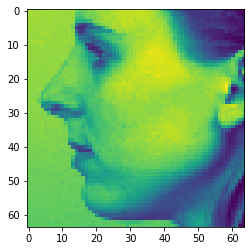

In [ ]:
import matplotlib.pyplot as plt
print(X_train_KDEF_48[0].shape)
##print(le.inverse_transform(y_train_KDEF[200]))
plt.imshow(X_train_KDEF_48[20])
plt.show()

In [ ]:
image.type

AttributeError: ignored